#Section 3: Section 3: Feed Forward NN

##MNIST Digits classification with Feed Forward NN

In [ ]:
import torch
import torch.nn as nn
import torchvision # for datasets
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
import numpy as np

In [ ]:
input_size = 784 # 28X28 images
hidden_size = 100
num_classes = 10 
num_epochs = 2
batch_size = 100
learning_rate = 0.001

In [ ]:
import warnings
warnings.filterwarnings('ignore')
# MNIST dataset from pytorch
train_dataset = torchvision.datasets.MNIST(root='/content/drive/MyDrive/AI-Internship/MNIST', train = True, transform = transforms.ToTensor(),download=True)
test_dataset = torchvision.datasets.MNIST(root='/content/drive/MyDrive/AI-Internship/MNIST', train = False, transform = transforms.ToTensor(),download=True)



Extracting /content/drive/MyDrive/AI-Internship/MNIST/MNIST/raw/train-images-idx3-ubyte.gz to /content/drive/MyDrive/AI-Internship/MNIST/MNIST/raw




Extracting /content/drive/MyDrive/AI-Internship/MNIST/MNIST/raw/train-labels-idx1-ubyte.gz to /content/drive/MyDrive/AI-Internship/MNIST/MNIST/raw




Extracting /content/drive/MyDrive/AI-Internship/MNIST/MNIST/raw/t10k-images-idx3-ubyte.gz to /content/drive/MyDrive/AI-Internship/MNIST/MNIST/raw




Extracting /content/drive/MyDrive/AI-Internship/MNIST/MNIST/raw/t10k-labels-idx1-ubyte.gz to /content/drive/MyDrive/AI-Internship/MNIST/MNIST/raw



In [ ]:
train_loader = torch.utils.data.DataLoader(dataset = train_dataset, batch_size = batch_size, shuffle = True)
test_loader = torch.utils.data.DataLoader(dataset = test_dataset, batch_size = batch_size, shuffle = False)

In [ ]:
print(f'length of train_dataset is : {len(train_dataset)} and length of train_loader is : {len(train_loader)}')
print(f'length of test_dataset is : {len(test_dataset)} and length of test_loader is : {len(test_loader)}')

length of train_dataset is : 60000 and length of train_loader is : 600
length of test_dataset is : 10000 and length of test_loader is : 100


Let's take a look at one batch of this dataset.

In [ ]:
examples = iter(train_loader)
#unpack examples
samples , labels = examples.next()
print(f'samples shape : {samples.shape} ,labels shape : {labels.shape}')

samples shape : torch.Size([100, 1, 28, 28]) ,labels shape : torch.Size([100])


Let's plot 6 images of this batch.

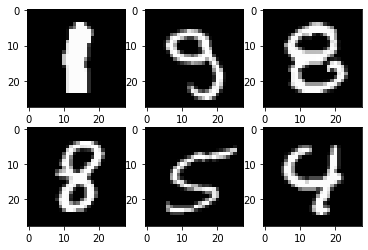

In [ ]:
for i in range(6):
  plt.subplot(2,3, i+1)
  plt.imshow(samples[i][0],cmap='gray')

In [ ]:
class NeuralNet(nn.Module):

  def __init__(self, input_size, hidden_size, num_classes):
    super(NeuralNet, self).__init__()
    self.l1 = nn.Linear(input_size, hidden_size)
    self.relu = nn.ReLU()
    self.l2 = nn.Linear(hidden_size,num_classes)
  
  def forward(self,x):
    out = self.l1(x)
    out = self.relu(out)
    out = self.l2(out)
    return out

In [ ]:
# create model
model_mnist = NeuralNet(input_size,hidden_size,num_classes)

# create loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_mnist.parameters(), lr= learning_rate)

total_input = len(train_loader)

###Train the model

In [ ]:
list = []

for epoch in range(num_epochs):
  for i, (image, label) in enumerate(train_loader):
    # shape of image is 100,1,28,28 , we want to reshape it to 100, 784
    image = image.reshape(-1, 784)

    # forward pass
    y_pred_mnist = model_mnist(image)
    loss = criterion(y_pred_mnist, label)

    # backward pass
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (i+1) % 100 == 0:
      print(f'epoch : {epoch+1}/{num_epochs} , step : {i+1}/{total_input}, loss : {loss.item():.4f} ')
      list.append([epoch+1,i+1, loss.item()])

epoch : 1/2 , step : 100/600, loss : 0.4466 
epoch : 1/2 , step : 200/600, loss : 0.4063 
epoch : 1/2 , step : 300/600, loss : 0.3583 
epoch : 1/2 , step : 400/600, loss : 0.2705 
epoch : 1/2 , step : 500/600, loss : 0.3247 
epoch : 1/2 , step : 600/600, loss : 0.2468 
epoch : 2/2 , step : 100/600, loss : 0.2096 
epoch : 2/2 , step : 200/600, loss : 0.2642 
epoch : 2/2 , step : 300/600, loss : 0.2267 
epoch : 2/2 , step : 400/600, loss : 0.1761 
epoch : 2/2 , step : 500/600, loss : 0.2349 
epoch : 2/2 , step : 600/600, loss : 0.0953 


###Test the model

In [ ]:
# we don't calculate gradient in this phase

with torch.no_grad():
  n_true = 0
  n_total = 0

  for image_test, label_test in test_loader:
    
    image_test = image_test.reshape(-1,784)
    output = model_mnist(image_test)

    _, y_pred_test = torch.max(output,1)
    n_true += (y_pred_test == label_test).sum()
    n_total += label.size(0)


print(f'accuracy of model on the 10000 images is : {(n_true/n_total) *100}')


accuracy of model on the 10000 images is : 95.4800033569336


In [ ]:
print(list)

[[1, 100, 0.4466078281402588], [1, 200, 0.40632733702659607], [1, 300, 0.3583229184150696], [1, 400, 0.27051863074302673], [1, 500, 0.3246749937534332], [1, 600, 0.24675136804580688], [2, 100, 0.20962238311767578], [2, 200, 0.2642391324043274], [2, 300, 0.2267332673072815], [2, 400, 0.17606474459171295], [2, 500, 0.23492076992988586], [2, 600, 0.09532473236322403]]


In [ ]:
len(list)

12

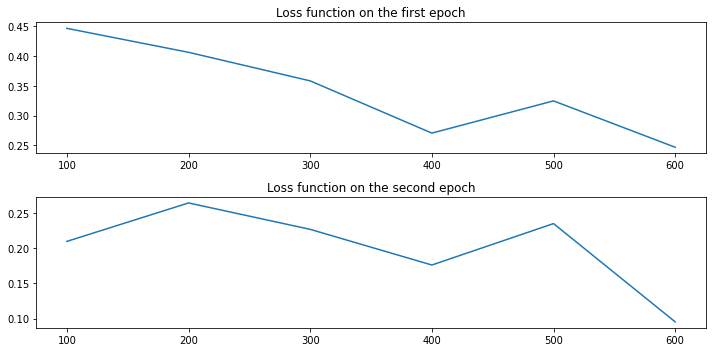

In [ ]:
import seaborn as sns
fig, axs = plt.subplots(2,1,figsize =(10, 5))
axs[0].set_title("Loss function on the first epoch")
sns.lineplot(x = [list[i][1] for i in range(6)] , y = [list[i][2] for i in range(6)], ax = axs[0])
axs[1].set_title("Loss function on the second epoch")
sns.lineplot(x = [list[i][1] for i in range(6,len(list))] , y = [list[i][2] for i in range(6,len(list))], ax = axs[1])
plt.tight_layout()

##Heart Disease classification with Feed Forward NN

Download the data and then save it in drive.

In [ ]:
import requests

url = 'https://web.stanford.edu/~hastie/ElemStatLearn/datasets/SAheart.data'
r = requests.get(url, allow_redirects=True)

open('SAheart.data', 'wb').write(r.content)

25106

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

data = pd.read_csv('/content/drive/MyDrive/AI-Internship/SAheart.data')

In [ ]:
data.head()

,row.names,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,1,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
1,2,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
2,3,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
3,4,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
4,5,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1


In [ ]:
data.shape

(462, 11)

In [ ]:
data = data.drop(columns='row.names')

In [ ]:
data.head()

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
1,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
2,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
3,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
4,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1


We should use label encoder to converting labels into numeric form so that machine can read it.

In [ ]:
from sklearn.preprocessing import LabelEncoder

# present: 1 and absent: 0
le = LabelEncoder()
data['famhist'] = le.fit_transform(data['famhist'])

In [ ]:
data.head()

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,160,12.00,5.73,23.11,1,49,25.30,97.20,52,1
1,144,0.01,4.41,28.61,0,55,28.87,2.06,63,1
2,118,0.08,3.48,32.28,1,52,29.14,3.81,46,0
3,170,7.50,6.41,38.03,1,51,31.99,24.26,58,1
4,134,13.60,3.50,27.78,1,60,25.99,57.34,49,1


we should check for missing values.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 462 entries, 0 to 461
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sbp        462 non-null    int64  
 1   tobacco    462 non-null    float64
 2   ldl        462 non-null    float64
 3   adiposity  462 non-null    float64
 4   famhist    462 non-null    int64  
 5   typea      462 non-null    int64  
 6   obesity    462 non-null    float64
 7   alcohol    462 non-null    float64
 8   age        462 non-null    int64  
 9   chd        462 non-null    int64  
dtypes: float64(5), int64(5)
memory usage: 36.2 KB


Text(0.5, 1.0, 'Box Plot for each feature')

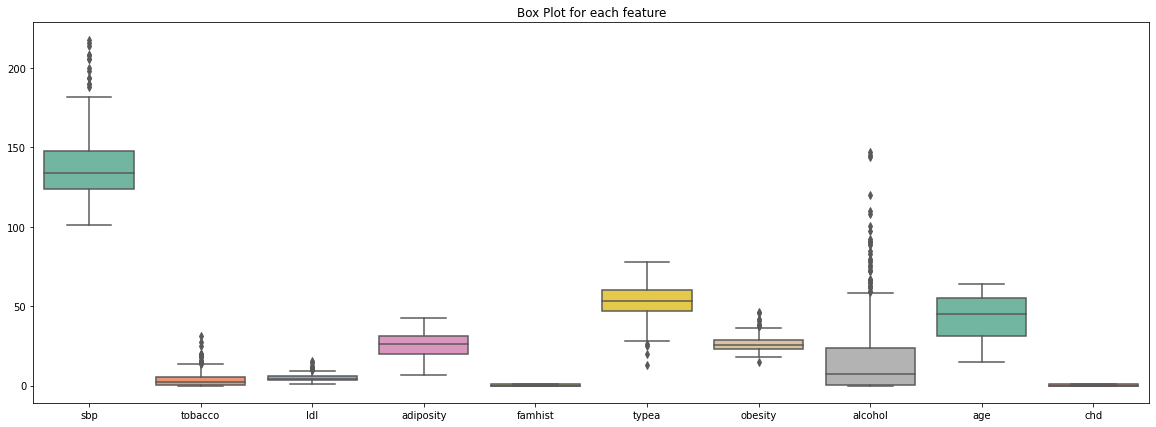

In [ ]:
fig = plt.figure(figsize =(20, 7))
# Creating plot
ax = sns.boxplot(data=data, orient="v", palette="Set2")
plt.title("Box Plot for each feature")

sbp,tobacco, ldl,typea, obesity and alcohol have outlier data. so we should treat outlier data.

In [ ]:
Outlier_columns = ['sbp','tobacco','ldl','obesity','alcohol']
for i in Outlier_columns:
  median = data[i].quantile(0.50)
  threshold = data[i].quantile(0.80)
  data[i] = np.where(data[i] > threshold , median, data[i])

In [ ]:
Outlier_columns = ['typea','obesity']
for i in Outlier_columns:
  median = data[i].quantile(0.50)
  threshold = data[i].quantile(0.20)
  data[i] = np.where(data[i] < threshold , median, data[i])

Text(0.5, 1.0, 'Box Plot for each feature')

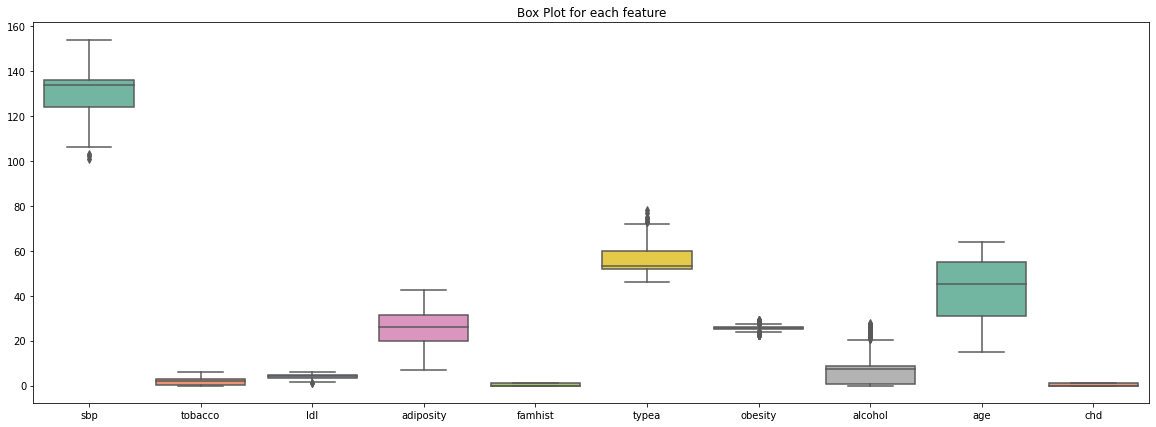

In [ ]:
fig = plt.figure(figsize =(20, 7))
# Creating plot
ax = sns.boxplot(data=data, orient="v", palette="Set2")
plt.title("Box Plot for each feature")

In [ ]:
data.describe()

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
count,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000
mean,131.298701,1.829329,4.017056,25.406732,0.415584,55.870130,25.759778,7.042641,42.816017,0.346320
std,10.645009,1.732634,1.050609,7.780699,0.493357,6.491812,1.429216,7.192839,14.608956,0.476313
min,101.000000,0.000000,0.980000,6.740000,0.000000,46.000000,22.400000,0.000000,15.000000,0.000000
25%,124.000000,0.052500,3.282500,19.775000,0.000000,52.000000,25.277500,0.510000,31.000000,0.000000
50%,134.000000,2.000000,4.340000,26.115000,0.000000,53.000000,25.803750,7.460000,45.000000,0.000000
75%,136.000000,2.677500,4.625000,31.227500,1.000000,60.000000,26.157500,8.487500,55.000000,1.000000
max,154.000000,6.100000,6.130000,42.490000,1.000000,78.000000,29.010000,27.670000,64.000000,1.000000


###Correlation matrix

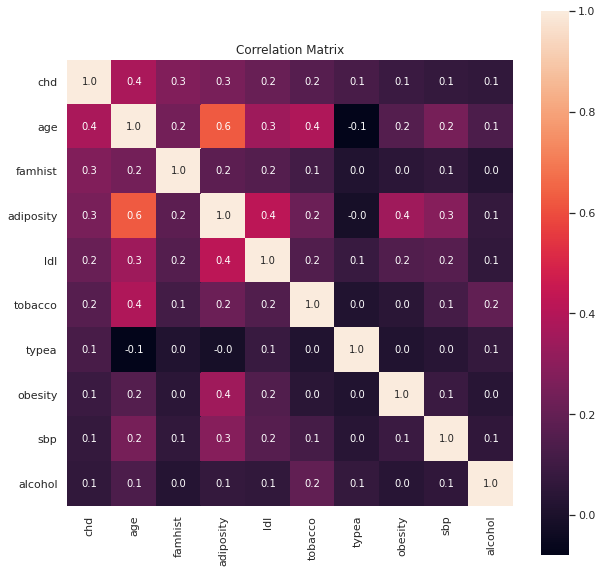

In [ ]:
#chd correlation matrix
correlation_matrix = data.corr()
k = 10 #number of variables for heatmap
cols = correlation_matrix.nlargest(k,'chd')['chd'].index
cm = np.corrcoef(data[cols].values.T)
sns.set(font_scale=1)
fig, ax = plt.subplots(figsize=(10,10))         # Sample figsize in inches
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.01f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values,ax=ax)
plt.title("Correlation Matrix")
plt.show()

In [ ]:
#Correlation with output variable
cor_target = abs(correlation_matrix['chd'])

#Selecting highly correlated features
relevant_features = cor_target[cor_target>=0.2]
relevant_features

ldl          0.210284
adiposity    0.254121
famhist      0.272373
age          0.372973
chd          1.000000
Name: chd, dtype: float64

In [ ]:
data.columns

Index(['sbp', 'tobacco', 'ldl', 'adiposity', 'famhist', 'typea', 'obesity',
       'alcohol', 'age', 'chd'],
      dtype='object')

In [ ]:
data.drop(labels=['sbp', 'tobacco','typea', 'obesity','alcohol'], axis=1, inplace=True) # remove irrelavent columns features
data.head()

,ldl,adiposity,famhist,age,chd
0,5.73,23.11,1,52,1
1,4.41,28.61,0,63,1
2,3.48,32.28,1,46,0
3,4.34,38.03,1,58,1
4,3.50,27.78,1,49,1


We should separate features and target.

In [ ]:
features = data.drop(columns='chd')
target = pd.DataFrame(data['chd'])

In [ ]:
print(f'feature shape : {features.shape}')
print(f'target shape : {target.shape}')

feature shape : (462, 4)
target shape : (462, 1)


Implement a custom Dataset class.

In [ ]:
from torch.utils.data import Dataset, DataLoader
from sklearn.preprocessing import StandardScaler

class SAheartdata(Dataset):

    def __init__(self, X, y):
 
        self.n_samples = X.shape[0]

        # Standardization
        sc = StandardScaler()
        X = sc.fit_transform(X)

        # convert DataFrame to numpy array
        y = y.to_numpy()

        # convert numpy to tensor
        self.x_data = torch.from_numpy(X.astype(np.float32)) # size [n_samples, n_features]
        self.y_data = torch.from_numpy(y.astype(np.float32)) # size [n_samples, 1]

    # support indexing such that dataset[i] can be used to get i-th sample
    def __getitem__(self, index):
        return self.x_data[index], self.y_data[index]

    # we can call len(dataset) to return the size
    def __len__(self):
        return self.n_samples

###Split data into train and test

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=1234)

In [ ]:
print(f'X_train shape : {X_train.shape}')
print(f'X_test shape : {X_test.shape}')
print(f'y_train shape : {y_train.shape}')
print(f'y_test shape : {y_test.shape}')

X_train shape : (369, 4)
X_test shape : (93, 4)
y_train shape : (369, 1)
y_test shape : (93, 1)


In [ ]:
# create data
train_data = SAheartdata(X_train,y_train)
test_data = SAheartdata(X_test,y_test)

In [ ]:
# get first sample of train data
x_sample, y_sample = train_data[0]
print(f'x_sample : {x_sample} and y_sample : {y_sample}')
print(f'x_sample shape : {x_sample.shape} and y_sample shape : {y_sample.shape}')

x_sample : tensor([ 0.7831, -0.2853, -0.8463, -0.0787]) and y_sample : tensor([0.])
x_sample shape : torch.Size([4]) and y_sample shape : torch.Size([1])


In [ ]:
# create dataloaders
train_loader = torch.utils.data.DataLoader(dataset = train_data, batch_size = batch_size, shuffle = True)
test_loader = torch.utils.data.DataLoader(dataset = test_data, batch_size = batch_size, shuffle = False)

In [ ]:
print(f'length of train data is : {len(train_data)} and length of train loader is : {len(train_loader)}')
print(f'length of test data is : {len(test_data)} and length of test loader is : {len(test_loader)}')

length of train data is : 369 and length of train loader is : 37
length of test data is : 93 and length of test loader is : 10


In [ ]:
# get an example of train loader
example= iter(train_loader)

# unpack example
sample_x,sample_y = example.next()
 
print(f'samples shape : {sample_x.shape} ,labels shape : {sample_y.shape}')

samples shape : torch.Size([10, 4]) ,labels shape : torch.Size([10, 1])


In [ ]:
# set parameters
input_size = 4
hidden_size = 5
num_classes = 1
num_epochs = 2
learning_rate = 0.01
batch_size = 10

In [ ]:
# create neural network class
class NeuralNet(nn.Module):

  def __init__(self, input_size, hidden_size, num_classes):
    super(NeuralNet, self).__init__()
    self.l1 = nn.Linear(input_size, hidden_size)
    self.relu = nn.ReLU()
    self.l2 = nn.Linear(hidden_size,num_classes)
    self.sigmoid = nn.Sigmoid()
  
  def forward(self,x):
    out = self.l1(x)
    out = self.relu(out)
    out = self.l2(out)
    out = self.sigmoid(out)
    return out

In [ ]:
# create model
model_hd = NeuralNet(input_size,hidden_size,num_classes)

# create loss and optimizer
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model_hd.parameters(), lr= learning_rate)

total_input = len(train_loader)

###Train the model

In [ ]:
list_hd = []

for epoch in range(num_epochs):
  for i, (x, y) in enumerate(train_loader):

    # forward pass
    y_pred_hd = model_hd(x)
    loss = criterion(y_pred_hd, y)

    # backward pass
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (i+1) % 6 == 0:
      print(f'epoch : {epoch+1}/{num_epochs} , step : {i+1}/{total_input}, loss : {loss.item():.4f} ')
      list_hd.append([epoch+1,i+1, loss.item()])

epoch : 1/2 , step : 6/37, loss : 0.6416 
epoch : 1/2 , step : 12/37, loss : 0.6174 
epoch : 1/2 , step : 18/37, loss : 0.5874 
epoch : 1/2 , step : 24/37, loss : 0.6535 
epoch : 1/2 , step : 30/37, loss : 0.5149 
epoch : 1/2 , step : 36/37, loss : 0.8882 
epoch : 2/2 , step : 6/37, loss : 0.4603 
epoch : 2/2 , step : 12/37, loss : 0.5489 
epoch : 2/2 , step : 18/37, loss : 0.5176 
epoch : 2/2 , step : 24/37, loss : 0.6512 
epoch : 2/2 , step : 30/37, loss : 0.4596 
epoch : 2/2 , step : 36/37, loss : 0.4341 


###Test the model

In [ ]:
# we don't calculate gradient in this phase

with torch.no_grad():
  n_true = 0
  n_total = 0

  for x_test, y_test in test_loader:
    
    output = model_hd(x_test)
    y_pred = np.round(output) 

    n_true += (y_pred == y_test).sum()
    n_total += y_test.size(0)


print(f'accuracy of model on the 93 data is : {(n_true/n_total) *100}')


accuracy of model on the 93 data is : 67.74193572998047


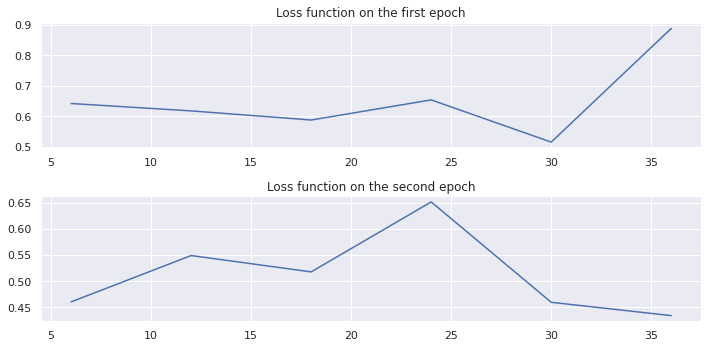

In [ ]:
import seaborn as sns
fig, axs = plt.subplots(2,1,figsize =(10, 5))
axs[0].set_title("Loss function on the first epoch")
sns.lineplot(x = [list_hd[i][1] for i in range(6)] , y = [list_hd[i][2] for i in range(6)], ax = axs[0])
axs[1].set_title("Loss function on the second epoch")
sns.lineplot(x = [list_hd[i][1] for i in range(6,len(list_hd))] , y = [list_hd[i][2] for i in range(6,len(list_hd))], ax = axs[1])
plt.tight_layout()

#Section 4: Convolutional NN

##CIFAR-10 classification with CNN

In [1]:
import torch
import torch.nn as nn
import torchvision
from torchvision.transforms import transforms
import matplotlib.pyplot as plt
import numpy as np 
import torch.nn.functional as F

In [2]:
seed = torch.manual_seed(0)

# dataset has PILImage images of range[0,1], with normalize we convet them in range[-1,1]
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))
                  ,transforms.RandomHorizontalFlip(p=0.5)])

# create dataset
train_dataset = torchvision.datasets.CIFAR10(root='/content/drive/MyDrive/AI-Internship/CIFAR10', train= True, download= True, transform=transform)
test_dataset = torchvision.datasets.CIFAR10(root='/content/drive/MyDrive/AI-Internship/CIFAR10', train= False, download= True, transform=transform)

Files already downloaded and verified
Files already downloaded and verified


In [3]:
# number of elements per class
from collections import Counter
print(f'number of elements per train class : {dict(Counter(train_dataset.targets))}')
print(f' get mapping of label id to classe : {train_dataset.class_to_idx}')
print(f'number of elements per test class : {dict(Counter(test_dataset.targets))}')
print(f' get mapping of label id to classe : {test_dataset.class_to_idx}')

number of elements per train class : {6: 5000, 9: 5000, 4: 5000, 1: 5000, 2: 5000, 7: 5000, 8: 5000, 3: 5000, 5: 5000, 0: 5000}
 get mapping of label id to classe : {'airplane': 0, 'automobile': 1, 'bird': 2, 'cat': 3, 'deer': 4, 'dog': 5, 'frog': 6, 'horse': 7, 'ship': 8, 'truck': 9}
number of elements per test class : {3: 1000, 8: 1000, 0: 1000, 6: 1000, 1: 1000, 9: 1000, 5: 1000, 7: 1000, 4: 1000, 2: 1000}
 get mapping of label id to classe : {'airplane': 0, 'automobile': 1, 'bird': 2, 'cat': 3, 'deer': 4, 'dog': 5, 'frog': 6, 'horse': 7, 'ship': 8, 'truck': 9}


as we see, number of elements per class are equivalent.

In [4]:
num_epoch = 6
batch_size = 30
learning_rate= 0.001

# create dataloader
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size = batch_size, shuffle = True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size = batch_size, shuffle = False)

print(f'length of train_dataset is : {len(train_dataset)} and length of train_loader is : {len(train_loader)}')
print(f'length of test_dataset is : {len(test_dataset)} and length of test_loader is : {len(test_loader)}')

length of train_dataset is : 50000 and length of train_loader is : 1667
length of test_dataset is : 10000 and length of test_loader is : 334


Let's take a look at one batch of train_data

eamples shape : torch.Size([30, 3, 32, 32]) ,labels shape : torch.Size([30])


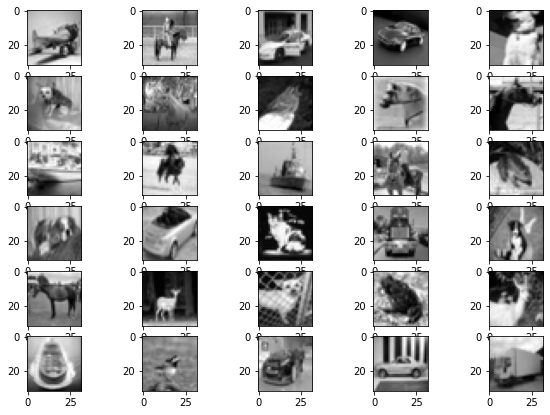

In [7]:
example = iter(train_loader)
image, label = example.next()

print(f'eamples shape : {image.shape} ,labels shape : {label.shape}')

plt.figure(figsize = (10,7))
for i in range(30):
  plt.subplot(6,5, i+1)
  plt.imshow(image[i][0],cmap='gray')

As we see, we have images with 3 color channels and they are 20X20 pixel(because of crap, actual images are 32 * 32). we should reshape them and flatten them in a tensor.

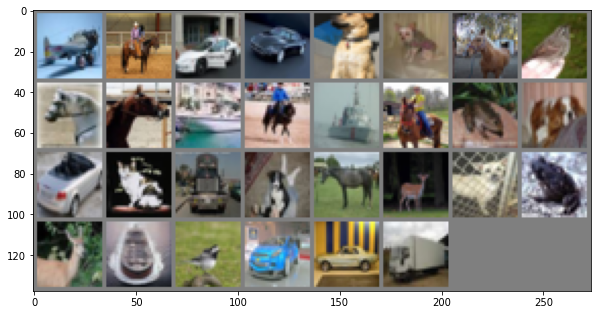

In [8]:
plt.figure(figsize = (10,7))
def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# show images
imshow(torchvision.utils.make_grid(image))

In [9]:
classes = ('airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [10]:
class ConvNet(nn.Module):
  def __init__(self):
    super(ConvNet,self).__init__() 
    self.conv1 = nn.Conv2d(3, 6, 5)
    self.pool = nn.MaxPool2d(2, 2)
    self.conv2 = nn.Conv2d(6, 16, 5)
    self.fc1 = nn.Linear(16 * 5 * 5, 120)
    self.fc2 = nn.Linear(120, 84)
    self.fc3 = nn.Linear(84, 10)


  def forward(self, x):
    # -> n, 3, 32, 32
    x = self.pool(F.relu(self.conv1(x)))  # -> n, 6, 14, 14
    x = self.pool(F.relu(self.conv2(x)))  # -> n, 16, 5, 5
    x = x.view(-1, 16 * 5 * 5)            # -> n, 400 , flatten x
    x = F.relu(self.fc1(x))               # -> n, 120
    x = F.relu(self.fc2(x))               # -> n, 84
    x = self.fc3(x)                       # -> n, 10
    return x

In [11]:
model_cifar = ConvNet()

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_cifar.parameters(), lr = learning_rate)

n_total_step = len(train_loader)

###Tain the model

In [12]:
from tqdm import tqdm

for epoch in tqdm(range(num_epoch)):

  for i , (image, label) in enumerate(train_loader):

    y_pred_cifar = model_cifar(image)
    loss = criterion(y_pred_cifar, label)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (i+1) % 1000 == 0:
      print (f'Epoch [{epoch+1}/{num_epoch}], Step [{i+1}/{n_total_step}], Loss: {loss.item():.4f}')


  0%|          | 0/6 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


Epoch [1/6], Step [1000/1667], Loss: 1.5736


 17%|█▋        | 1/6 [00:23<01:55, 23.07s/it]

Epoch [2/6], Step [1000/1667], Loss: 1.1495


 33%|███▎      | 2/6 [00:46<01:32, 23.08s/it]

Epoch [3/6], Step [1000/1667], Loss: 1.3286


 50%|█████     | 3/6 [01:09<01:09, 23.16s/it]

Epoch [4/6], Step [1000/1667], Loss: 1.2592


 67%|██████▋   | 4/6 [01:32<00:46, 23.14s/it]

Epoch [5/6], Step [1000/1667], Loss: 0.9105


 83%|████████▎ | 5/6 [01:55<00:23, 23.17s/it]

Epoch [6/6], Step [1000/1667], Loss: 0.8661


100%|██████████| 6/6 [02:19<00:00, 23.19s/it]


###Test the model

In [15]:
y_pred_test = []
with torch.no_grad():
  n_true = 0
  n_total = 0
  n_class_correct = [0 for i in range(10)]
  n_class_sample = [0 for i in range(10)]
  
  for im, lbs in test_loader:

    y_predtest = model_cifar(im)

    _, y_predtest = torch.max(y_predtest,1)

    n_true += (y_predtest == lbs).sum()
    n_total += lbs.size(0)

    for i in range(len(y_predtest)):
      y_pred_test.append(y_predtest[i])

    for i in range(len(y_predtest)):
      lb = lbs[i]
      pred = y_predtest[i]
      if pred == lb:
        n_class_correct[lb] += 1
      n_class_sample[lb] += 1   

  print(f'accuracy of network on the 1000 images is : {(n_true/n_total) *100}')
  
  for i in range(10):
    acc = 100.0 * n_class_correct[i] / n_class_sample[i]
    print(f'Accuracy of {classes[i]}: {acc} %')

accuracy of network on the 1000 images is : 64.18000030517578
Accuracy of airplane: 65.5 %
Accuracy of automobile: 86.1 %
Accuracy of bird: 63.4 %
Accuracy of cat: 34.4 %
Accuracy of deer: 57.5 %
Accuracy of dog: 51.9 %
Accuracy of frog: 74.3 %
Accuracy of horse: 61.5 %
Accuracy of ship: 77.5 %
Accuracy of truck: 69.7 %


In [16]:
type(test_dataset.targets)

list

Text(0.5, 257.44, 'Predicted label')

<Figure size 720x720 with 0 Axes>

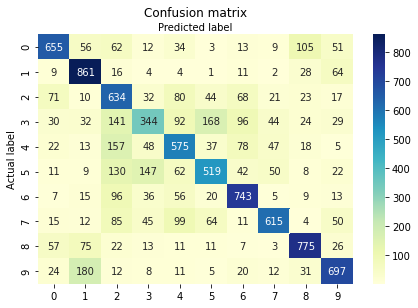

In [17]:
from sklearn import metrics
import seaborn as sns
import pandas as pd

plt.figure(figsize = (10,10))
cnf_matrix = metrics.confusion_matrix(test_dataset.targets, y_pred_test)

class_names=[0,1,2,3,4,5,6,7,8,9] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

{'airplane': 0, 'automobile': 1, 'bird': 2, 'cat': 3, 'deer': 4, 'dog': 5, 'frog': 6, 'horse': 7, 'ship': 8, 'truck': 9}

##Intel Image classification with CNN

In [29]:
import zipfile
# unzip image file
local_zip = '/content/drive/MyDrive/AI-Internship/Intel Image .zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/drive/MyDrive/AI-Internship/IntelImage')
zip_ref.close()

In [30]:
# see what folders are in path
!ls "/content/drive/MyDrive/AI-Internship/IntelImage"

seg_pred  seg_test  seg_train


In [43]:
import os
print(len(os.listdir('/content/drive/MyDrive/AI-Internship/IntelImage/seg_pred/seg_pred'))) # number of pictures in pics
print(len(os.listdir('/content/drive/MyDrive/AI-Internship/IntelImage/seg_train/seg_train'))) # number of pictures in pics
print(len(os.listdir('/content/drive/MyDrive/AI-Internship/IntelImage/seg_test/seg_test'))) # number of pictures in pics


7301
6
6
